In [1]:
import shutil
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
!pip install ipygany

import torch

if torch.cuda.is_available():
    print("CUDA is available. GPU is enabled.")
else:
    print("CUDA is not available. Please enable GPU in your runtime settings.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.3 MB/s eta 0:00:00
CUDA is available. GPU is enabled.


In [2]:
# Install necessary libraries
!pip install torch pandas scikit-learn
!apt-get install -y wget unzip

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [3]:
# Clone the PointConv repository
!git clone https://github.com/DylanWusee/pointconv_pytorch.git

# Change directory to the project folder
%cd pointconv_pytorch

Cloning into 'pointconv_pytorch'...
remote: Enumerating objects: 63, done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 63
Receiving objects: 100% (63/63), 22.56 KiB | 2.51 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/pointconv_pytorch


In [4]:
# Download ModelNet40 dataset with --no-check-certificate option
!wget --no-check-certificate https://shapenet.cs.stanford.edu/media/modelnet40_normal_resampled.zip

--2024-06-30 16:59:08--  https://shapenet.cs.stanford.edu/media/modelnet40_normal_resampled.zip
Resolving shapenet.cs.stanford.edu (shapenet.cs.stanford.edu)... 171.67.77.19
Connecting to shapenet.cs.stanford.edu (shapenet.cs.stanford.edu)|171.67.77.19|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 1705117335 (1.6G) [application/zip]
Saving to: ‘modelnet40_normal_resampled.zip’

modelnet40_normal_r 100%[===================>]   1.59G  28.4MB/s    in 59s     

2024-06-30 17:00:08 (27.4 MB/s) - ‘modelnet40_normal_resampled.zip’ saved [1705117335/1705117335]



In [5]:
# Unzip the dataset and place it in the correct directory
!unzip modelnet40_normal_resampled.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0412.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0473.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0258.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0663.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0384.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0362.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0048.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0344.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0027.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0288.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0682.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0432.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0702.txt  
  inflating: data/modelnet40_normal_resampled/sofa/sofa_0083.txt  
  inflating

In [18]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. GPU is enabled.")
else:
    print("CUDA is not available. Please enable GPU in your runtime settings.")

CUDA is available. GPU is enabled.


In [48]:
!python train_pointnet.py --model pointnet --normal --epoch 10

The size of train data is 9843
The size of test data is 2468
No existing model, starting training from scratch...
Epoch 1 (1/10):
 16% 48/308 [00:15<01:26,  3.00it/s]



In [13]:
# After training, evaluate the model (adjust the checkpoint path as needed)
!python eval_cls_conv.py --checkpoint ./checkpoints/checkpoint.pth --normal

The size of test data is 2468
Load CheckPoint...
Start evaluating...
100% 78/78 [00:57<00:00,  1.36it/s]
Total Accuracy: 0.925080


#Load Dataset from drive

In [ ]:
# Define the path to your file in Google Drive
drive_file_path = '/content/drive/MyDrive/datasets/modelnet40_normal_resampled.zip'

# Define the destination path in Colab
colab_destination_path = '/content/modelnet40_normal_resampled.zip'

# Copy the file from Google Drive to Colab
shutil.copy(drive_file_path, colab_destination_path)

# Optional: Unzip the file if needed
with zipfile.ZipFile(colab_destination_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
dataset_path = '/content/modelnet40_normal_resampled'
files = os.listdir(dataset_path)
print(files)

# Get the list of categories (directories)
categories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print(f"Total number of categories: {len(categories)}")
print("Categories:", categories)

# Count the number of files in each category
category_file_counts = {}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    files = os.listdir(category_path)
    category_file_counts[category] = len(files)

# Print the number of files in each category
for category, count in category_file_counts.items():
    print(f"{category}:{count}", end=" ")

['stool', 'glass_box', 'filelist.txt', 'wardrobe', 'bookshelf', 'cup', 'modelnet40_test.txt', 'bowl', 'modelnet10_test.txt', 'monitor', 'xbox', 'tv_stand', 'mantel', 'sofa', 'desk', 'modelnet40_shape_names.txt', 'bottle', 'keyboard', 'guitar', 'plant', 'sink', 'radio', 'chair', 'vase', 'modelnet40_train.txt', 'range_hood', 'table', 'door', 'lamp', 'bed', 'flower_pot', 'curtain', 'tent', 'night_stand', 'piano', 'modelnet10_train.txt', 'car', 'airplane', 'modelnet10_shape_names.txt', 'bench', 'dresser', 'toilet', 'person', 'laptop', 'bathtub', 'cone', 'stairs']
Total number of categories: 40
Categories: ['stool', 'glass_box', 'wardrobe', 'bookshelf', 'cup', 'bowl', 'monitor', 'xbox', 'tv_stand', 'mantel', 'sofa', 'desk', 'bottle', 'keyboard', 'guitar', 'plant', 'sink', 'radio', 'chair', 'vase', 'range_hood', 'table', 'door', 'lamp', 'bed', 'flower_pot', 'curtain', 'tent', 'night_stand', 'piano', 'car', 'airplane', 'bench', 'dresser', 'toilet', 'person', 'laptop', 'bathtub', 'cone', 'stai

In [ ]:
def load_txt(file_path):
    return np.loadtxt(file_path, delimiter=',')

# Function to visualize a point cloud
def visualize_point_cloud(points):
    fig = plt.figure(figsize=(15, 10))

    # Subplot 1: Only Points
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='k')
    ax1.set_title('Only Points')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Subplot 2: Colored by Z value
    ax2 = fig.add_subplot(122, projection='3d')
    p = ax2.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c=points[:, 2], cmap='jet')
    fig.colorbar(p, ax=ax2)
    ax2.set_title('Points Colored by Z value')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

Loaded point cloud of bed


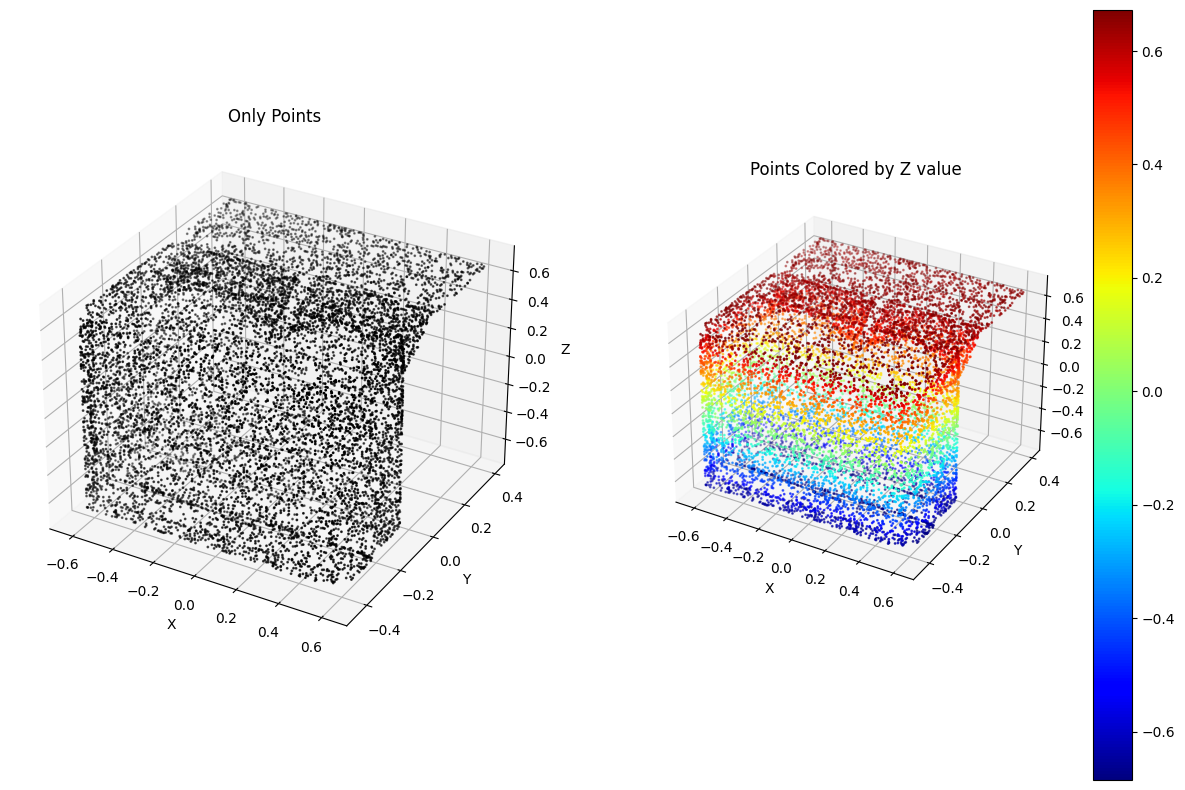

In [ ]:
import random

num_of_samples = 1
for i in range(num_of_samples):
    category = random.choice(categories)
    sample_files = os.listdir(os.path.join(dataset_path, category))
    sample_file_path = os.path.join(dataset_path, category, random.choice(sample_files))
    points = load_txt(sample_file_path)
    print(f"Loaded point cloud of {category}")

    # Visualize the loaded point cloud with faces
    visualize_point_cloud(points)